# Photometric Classification of Galaxies, Quasars and Stars using Machine-Learning



##This notebook presents an implementation of machine learning based photometric classification of astronomical objects using optical and infrared survey.
##The study is based on the Research paper - Machine learning-based photometric classification of galaxies, quasars, emission-line galaxies, and stars.

We focus on the three-class classification problem, where we construct two feature sets adopting the core methodology of the original paper:
  i) An optical only sample using SDSS photometry

  ii) A combined Optical and infrared sample incorporating mid-range infrared information from ALLWISE

We evaluate and examine the results of multiple Machine Learning models on an unbalanced real-world dataset.

The primary objective is to examine the impact of infrared information on classification performance and to demonstrate that the combined use of optical and infrared features leads to more accurate and robust identification of astronomical object classes across diverse model architectures.

In [ ]:
'''Operating System Functionality'''
import os

'''Data Handling & Linear Algebra'''
import numpy as np
import pandas as pd

'''Visualisation'''
import matplotlib.pyplot as plt
import seaborn as sns

'''Data Analysis'''
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

'''Measuring Classification Performance'''
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

'''Classification & Regression'''
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier

'''Ignore warnings'''
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

### 1)Data Cleaning and Preprocessing

In [ ]:
'''
importing the ALLWISE + SDSS DR17 dataset
obtained by cross-matching the SDSS DR17 with the ALLWISE catalog
using right ascension and declination
'''
data = pd.read_csv("/content/Merged_ALLWISE_and_SDSS_DR17.csv",index_col=0)
data.shape

(79420, 26)

In [ ]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79419 entries, 1.2376609613277432e+18 to 1.2376611513788012e+18
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   alpha        79419 non-null  float64
 1   delta        79419 non-null  float64
 2   u            79419 non-null  float64
 3   g            79419 non-null  float64
 4   r            79419 non-null  float64
 5   i            79419 non-null  float64
 6   z            79419 non-null  float64
 7   run_ID       79419 non-null  int64  
 8   rerun_ID     79419 non-null  int64  
 9   cam_col      79419 non-null  int64  
 10  field_ID     79419 non-null  int64  
 11  spec_obj_ID  79419 non-null  float64
 12  class        79419 non-null  object 
 13  redshift     79419 non-null  float64
 14  plate        79419 non-null  int64  
 15  MJD          79419 non-null  int64  
 16  fiber_ID     79419 non-null  int64  
 17  cntr_01      79419 non-null  int64  
 18  dist_x       

In [ ]:
data['class'].value_counts()          #This shows the dataset is unbalanced

,count
class,
GALAXY,52621
QSO,13820
STAR,12978


In [ ]:
data.describe()


,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,...,fiber_ID,cntr_01,dist_x,pang_x,ra_01,dec_01,ra,dec,w1mpro,w2mpro
count,79419.000000,79419.000000,79419.000000,79419.000000,79419.000000,79419.000000,79419.000000,79419.000000,79419.0,79419.000000,...,79419.000000,79419.000000,79419.000000,79419.000000,79419.000000,79419.000000,79419.000000,79419.000000,79419.000000,79419.000000
mean,177.607934,24.498420,21.845272,20.331558,19.361979,18.744362,18.262400,4432.346920,301.0,3.510520,...,443.282917,50163.247686,0.386613,1.493667,177.607934,24.498420,177.607936,24.498423,15.379643,15.094694
std,94.817151,19.731009,35.636281,35.616385,1.845676,1.675983,35.583637,1943.380302,0.0,1.586953,...,270.117017,28812.295273,0.386085,101.567489,94.817151,19.731009,94.817150,19.731011,1.102279,1.049448
min,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,...,1.000000,1.000000,0.001463,-180.000000,0.005528,-18.785328,0.005575,-18.785384,7.280000,7.363000
25%,128.968850,5.698085,20.093895,18.610410,17.739790,17.337945,17.071405,3180.000000,301.0,2.000000,...,217.000000,25436.500000,0.127034,-83.614970,128.968850,5.698085,128.968845,5.698051,14.678000,14.399000
50%,181.663730,24.176046,22.052030,20.888700,19.772430,19.079290,18.681070,4187.000000,301.0,4.000000,...,425.000000,50306.000000,0.245049,4.105661,181.663730,24.176046,181.663937,24.176039,15.397000,15.172000
75%,232.119817,40.327392,23.683745,22.106195,20.789470,19.953485,19.522135,5322.000000,301.0,5.000000,...,633.000000,75091.500000,0.500260,85.299358,232.119817,40.327392,232.119696,40.327334,16.037000,15.769000
max,359.999810,83.000519,29.186370,31.602240,27.397090,30.154600,29.383740,8162.000000,301.0,6.000000,...,1000.000000,100000.000000,1.999923,180.000000,359.999810,83.000519,359.999787,83.000537,18.831000,18.216000


In [ ]:
#Dropping redundant columns of right ascension and declination
#Then renaming W1mpro to W1 and W2mpro to W2

data.drop(['ra','dec','ra_01','dec_01'], axis=1, inplace=True)
data.rename(columns={'w1mpro':'W1','w2mpro':'W2'},inplace=True)

In [ ]:
#converting 𝑊1 and 𝑊2 in Vega magnitudes to AB magnitudes by :
# 𝑊1 (AB) = 𝑊1 + 2.699
# 𝑊2 (AB) = 𝑊2 + 3.339

data['W1'] = data['W1'] + 2.699
data['W2'] = data['W2'] + 3.339

In [ ]:
#Using colours instead of raw magnitudes

data['u-g'] = data['u'] - data['g']
data['g-r'] = data['g'] - data['r']
data['r-i'] = data['r'] - data['i']
data['i-z'] = data['i'] - data['z']
data['z-W1'] = data['z'] - data['W1']
data['W1-W2'] =  data['W1'] - data['W2']

In [ ]:
data.head()

,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,...,dist_x,pang_x,W1,W2,u-g,g-r,r-i,i-z,z-W1,W1-W2
obj_ID,,,,,,,,,,,,,,,,,,,,,
1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,...,1.493228,-177.529263,17.254,17.836,1.60352,1.88029,1.22928,0.37202,1.53971,-0.582
1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,...,0.643836,4.467727,20.074,20.313,1.94571,0.24744,1.41632,-0.44615,1.54027,-0.239
1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,...,0.431104,-62.064833,19.056,19.744,-1.63974,2.16494,1.10708,1.25444,0.19410,-0.688
1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,...,0.966792,134.251743,16.213,16.657,1.85690,1.08281,0.52036,0.43250,-0.66839,-0.444
1.237680e+18,340.995121,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,8102,301,3,...,0.168172,-89.509379,18.598,19.120,0.15051,2.01581,1.06580,0.71071,0.94744,-0.522




---



### **2) The Samples**

In [ ]:
#We will be using only the photometric features for classification

Sample_1 = data[['u-g','g-r','r-i','i-z']]                 #Sample 1 - Optical
Sample_2 = data[['u-g','g-r','r-i','i-z','z-W1','W1-W2']]  #Sample 2 - Optical + IR
Sample_1.dtypes

,0
u-g,float64
g-r,float64
r-i,float64
i-z,float64


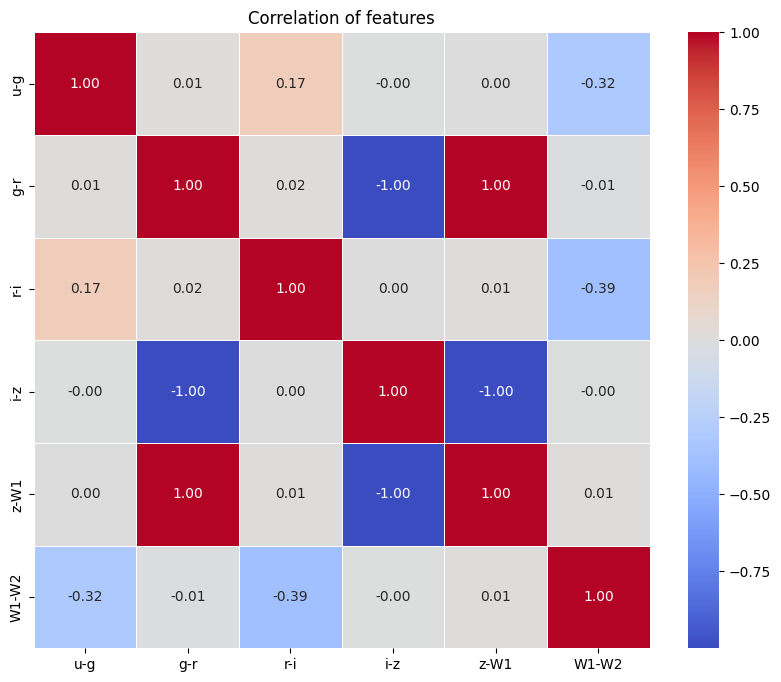

In [ ]:
#Heat map showing the correlation between features
corr_matrix = Sample_2.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,annot=True, fmt=".2f", cmap='coolwarm', center=0, square=True, linewidths=0.5)

plt.title('Correlation of features')
plt.show()

In [ ]:
# Mapping the SDSS classes
label_map = {'GALAXY':0, 'STAR':1, 'QSO':2}
y = data['class'].map(label_map)



---



### **3) First part of Methodology - Three-class experiment classification for sources into Galaxies, Stars and QSOs by Random Forest**

We will be using unbalanced datasets for both Optical and Optical+IR methods.

In [ ]:
def model_split(Sample):
    '''
    Split the dataset into train and test

    Parameters:
    ---
    Sample : Pandas Dataframe
    A Dataframe containing the optical or optical+IR features

    Returns:
    ---
    splits : dict
    A dictionary containing X_train, X_test, y_train, and y_test
    '''
    X_train, X_test, y_train, y_test = train_test_split(Sample, y, test_size=0.2, stratify=y, random_state=42)
    splits={'X_train':X_train,'X_test':X_test,'y_train':y_train,'y_test':y_test}
    return splits

In [ ]:
splits_1 = model_split(Sample_1)
splits_2 = model_split(Sample_2)

Random Forest Algorithm


In [ ]:

def cf_randfo(splits):
  '''
  Train and evaluate a Random Forest Classifier

  Parameters:
  ---
  splits : dict
  A dictionary containing X_train, X_test, y_train, and y_test

  Returns:
  ---
  cf : dict
  A dictionary containing the trained Random Forest Classifier and its classification report
  '''
  randfo = RandomForestClassifier(n_estimators=300, max_depth=None, class_weight='balanced', random_state=42)
  randfo.fit(splits['X_train'], splits['y_train'])
  cf = {'randfo':randfo,'cf_report':classification_report(splits['y_test'], randfo.predict(splits['X_test']),output_dict=True)}
  return cf


Optical:

In [ ]:
RF = [cf_randfo(splits_1), cf_randfo(splits_2)]
randfo_rep_op = RF[0]['cf_report']                #Random Forest Classifier Report for Optical Sample
randfo_rep_op

{'0': {'precision': 0.9247468758551491,
  'recall': 0.9633219308247815,
  'f1-score': 0.9436403406711035,
  'support': 10524.0},
 '1': {'precision': 0.8953993055555556,
  'recall': 0.7946841294298922,
  'f1-score': 0.8420408163265306,
  'support': 2596.0},
 '2': {'precision': 0.911348872755063,
  'recall': 0.8628798842257598,
  'f1-score': 0.8864523322802453,
  'support': 2764.0},
 'accuracy': 0.9182825484764543,
 'macro avg': {'precision': 0.9104983513885893,
  'recall': 0.8736286481601444,
  'f1-score': 0.8907111630926264,
  'support': 15884.0},
 'weighted avg': {'precision': 0.9176190508069005,
  'recall': 0.9182825484764543,
  'f1-score': 0.9170840563352407,
  'support': 15884.0}}

Optical+IR:

In [ ]:
randfo_rep_opir = RF[1]['cf_report']              #Random Forest Classifier Report for Optical Sample
randfo_rep_opir

{'0': {'precision': 0.9594519015659956,
  'recall': 0.9780501710376283,
  'f1-score': 0.9686617730095991,
  'support': 10524.0},
 '1': {'precision': 0.9556709265175719,
  'recall': 0.9218027734976888,
  'f1-score': 0.9384313725490196,
  'support': 2596.0},
 '2': {'precision': 0.944947209653092,
  'recall': 0.9066570188133141,
  'f1-score': 0.9254062038404727,
  'support': 2764.0},
 'accuracy': 0.9564341475698817,
 'macro avg': {'precision': 0.9533566792455531,
  'recall': 0.9355033211162104,
  'f1-score': 0.9441664497996971,
  'support': 15884.0},
 'weighted avg': {'precision': 0.9563099738605703,
  'recall': 0.9564341475698817,
  'f1-score': 0.9561941003340054,
  'support': 15884.0}}



---



### **3) Second Part of Methodology - Three-class experiment classification by Random Forest(RF), K-Nearest Neighbour(KNN), XGBoost (XGB), Voting, and Artificial Neural Network (ANN)**

XGBoost Model:

In [ ]:
def cf_xgb(splits):
  '''
  Train and evaluate an XGBoost Classifier

  Parameters:
  ---
  splits : dict
  A dictionary containing X_train, X_test, y_train, and y_test

  Returns:
  ---
  cf : dict
  A dictionary containing the trained XGBoost Classifier and its classification report
  '''

  xgb = XGBClassifier(
      n_estimators=300,
      max_depth=6,
      learning_rate=0.05,
      subsample=0.8,
      colsample_bytree=0.8,
      objective='multi:softprob',
      num_class=3,
      eval_metric='mlogloss',
      random_state=42
  )

  xgb.fit(splits['X_train'], splits['y_train'])
  y_xgb_pred = xgb.predict(splits['X_test'])

  cf = {'xgb':xgb,'cf_report':classification_report(splits['y_test'], y_xgb_pred,output_dict=True)}
  return cf


In [ ]:
XGB = [cf_xgb(splits_1), cf_xgb(splits_2)]
XGB_rep_op = XGB[0]['cf_report']              #XGBoost report for Optical Sample
XGB_rep_opir = XGB[1]['cf_report']            #XGBoost report for Optical+IR Sample


Scaling for ANN and KNN

In [ ]:
def scaling(splits):
  '''
  Scale the features of the train and test sets using StandardScaler
  for ANN and KNN

  Parameters:
  ---
  splits : dict
  A dictionary containing X_train, X_test, y_train, and y_test

  Returns:
  ---
  cf : dict
  A dictionary containing the scaled X_train, X_test, y_train, and y_test
  '''
  scaler = StandardScaler()
  splits['X_train'] = scaler.fit_transform(splits['X_train'])
  splits['X_test'] = scaler.transform(splits['X_test'])
  return splits

In [ ]:
#scaling the train_test splits:
splits_1 = scaling(splits_1)
splits_2 = scaling(splits_2)

ANN:

In [ ]:
def cf_ann(splits):
  '''
  Train and evaluate an Artificial Neural Network Classifier (ANN)
  This trains a feedforward neural network (MLP) with two hidden layers,
  uses Rectified Linear Unit (ReLU) as the activation function and
  uses the Adam optimizer for optimization.
  The model is trained for a fixed number of iterations with L2 regularization
  to mitigate overfitting.

  Parameters:
  ---
  Splits : dict
  A dictionary containing X_train, X_test, y_train, and y_test

  Returns:
  ---
  cf : dict
  A dictionary containing the trained Artificial Neural Network model
  and its classification report
  '''

  ann = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', alpha=1e-4, max_iter=300, random_state=42)

  ann.fit(splits['X_train'], splits['y_train'])
  y_ann_pred = ann.predict(splits['X_test'])

  cf = {'ann':ann,'cf_report':classification_report(splits['y_test'], y_ann_pred,output_dict=True)}
  return cf

In [ ]:
ANN= [cf_ann(splits_1), cf_ann(splits_2)]
ann_rep_op = ANN[0]['cf_report']            #Artificial Neural Network report for Optical Sample
ann_rep_opir = ANN[1]['cf_report']          #Artificial Neural Network report for Optical+IR Sample

KNN

In [ ]:

def cf_knn(splits):
  '''
  Train and evaluate a k-Nearest Neighbors (KNN) Classifier
  The classifier uses distance-weighted voting with the Minkowski metric
  allowing the closest neighbors to have a larger influence on the prediction.


  Parameters:
  ---
  Splits : dict
  A dictionary containing X_train, X_test, y_train, and y_test

  Returns:
  ---
  cf : dict
  A dictionary containing the trained KNN model
  and its classification report
  '''

  knn = KNeighborsClassifier(n_neighbors=15, weights='distance', metric='minkowski')

  knn.fit(splits['X_train'], splits['y_train'])
  y_knn_pred = knn.predict(splits['X_test'])

  cf = {'knn':knn,'cf_report':classification_report(splits['y_test'], y_knn_pred,output_dict=True)}
  return cf


In [ ]:
KNN = [cf_knn(splits_1), cf_knn(splits_2)]
knn_rep_op = KNN[0]['cf_report']              #KNN report for Optical Sample
knn_rep_opir = KNN[1]['cf_report']            #KNN report for Optical+IR Sample

Voting Classifier:

In [ ]:
def cf_voting(splits, num):
  '''
  Train and evaluate a weighted soft-voting ensemble classifier.

  It incorporates RF, XGB, and KNN classifiers with
  corresponding weights 2,2 and 1.

  Parameters:
  ---
  Splits : dict
  A dictionary containing X_train, X_test, y_train, and y_test

  num : int
  An integer denoting the Sample being used (0 for Optical, 1 for Optical+IR)

  Returns:
  ---
  cf : dict
  A dictionary containing the trained Voting model
  and its classification report
  '''
  voting = VotingClassifier(estimators=[('rf', RF[num]['randfo']), ('xgb', XGB[num]['xgb']), ('knn', KNN[num]['knn'])], voting='soft',weights = [2,2,1])

  voting.fit(splits['X_train'], splits['y_train'])
  y_vote_pred = voting.predict(splits['X_test'])

  cf = {'voting':voting,'cf_report':classification_report(splits['y_test'], y_vote_pred,output_dict=True)}
  return cf


In [ ]:
voting_rep_op = cf_voting(splits_1, 0)['cf_report']     #Voting Classifier report for Optical Sample
voting_rep_opir = cf_voting(splits_2, 1)['cf_report']   #Voting Classifier report for Optical+IR Sample



---



### **4)Results of the methodology - comparison of the performance metrics of diverse models on Optical and Optical+IR Samples**

Table for the performance of Various models:

In [ ]:
def class_metrics(report, cls):
  '''
  Extract the precision, recall, and F1-score for a
  specific class from the classification report

  Parameters:
  ---
  report : dict
  A dictionary containing the classification report

  cls : int
  An integer representing the class (0 - Galaxy, 1 - Star, 2 - QSO)

  Returns:
  ---
  precision : float
  The precision for the specified class

  recall : float
  The recall for the specified class

  f1-score : float
  The F1-score for the specified class
  '''
  return (
      report[str(cls)]['precision'],
      report[str(cls)]['recall'],
      report[str(cls)]['f1-score']
    )


In [ ]:
rows = []

models = [
    ('RF', randfo_rep_op, randfo_rep_opir),
    ('XGB', XGB_rep_op, XGB_rep_opir),
    ('KNN', knn_rep_op, knn_rep_opir),
    ('ANN', ann_rep_op, ann_rep_opir),
    ('Voting', voting_rep_op, voting_rep_opir),
]

for model, rep_op, rep_opir in models:

  #Optical Only
    G_P, G_R, G_F = class_metrics(rep_op, 0)
    S_P, S_R, S_F = class_metrics(rep_op, 1)
    Q_P, Q_R, Q_F = class_metrics(rep_op, 2)

    rows.append({
        'Features': 'Optical',
        'Classifier': model,
        'G-P': G_P, 'G-R': G_R, 'G-F1': G_F,
        'S-P': S_P, 'S-R': S_R, 'S-F1': S_F,
        'Q-P': Q_P, 'Q-R': Q_R, 'Q-F1': Q_F,
    })

  #Optical + IR
    G_P, G_R, G_F = class_metrics(rep_opir, 0)
    S_P, S_R, S_F = class_metrics(rep_opir, 1)
    Q_P, Q_R, Q_F = class_metrics(rep_opir, 2)

    rows.append({
        'Features': 'Optical + IR',
        'Classifier': model,
        'G-P': G_P, 'G-R': G_R, 'G-F1': G_F,
        'S-P': S_P, 'S-R': S_R, 'S-F1': S_F,
        'Q-P': Q_P, 'Q-R': Q_R, 'Q-F1': Q_F,
    })

cfdf = pd.DataFrame(rows)
cfdf


,Features,Classifier,G-P,G-R,G-F1,S-P,S-R,S-F1,Q-P,Q-R,Q-F1
0,Optical,RF,0.924747,0.963322,0.943640,0.895399,0.794684,0.842041,0.911349,0.862880,0.886452
1,Optical + IR,RF,0.959452,0.978050,0.968662,0.955671,0.921803,0.938431,0.944947,0.906657,0.925406
2,Optical,XGB,0.924697,0.963797,0.943842,0.890048,0.788906,0.836430,0.912395,0.862880,0.886947
3,Optical + IR,XGB,0.960557,0.976530,0.968478,0.948494,0.922188,0.935156,0.944006,0.908828,0.926083
4,Optical,KNN,0.900908,0.952014,0.925757,0.805294,0.691448,0.744041,0.885951,0.812229,0.847490
5,Optical + IR,KNN,0.923591,0.957906,0.940436,0.863777,0.752311,0.804200,0.911004,0.892547,0.901681
6,Optical,ANN,0.927893,0.956195,0.941832,0.877186,0.792373,0.832625,0.895323,0.872648,0.883840
7,Optical + IR,ANN,0.963186,0.972064,0.967605,0.929892,0.929892,0.929892,0.941132,0.908104,0.924323
8,Optical,Voting,0.921258,0.966078,0.943135,0.901339,0.777735,0.834988,0.911043,0.859624,0.884587
9,Optical + IR,Voting,0.960501,0.977385,0.968869,0.954854,0.920647,0.937439,0.941617,0.910275,0.925681


In every classifier, the Optical+IR trained models have performed better than the Optical trained models.

Random Forest and XGB model have better performance parameters than KNN and ANN.

As observed from the heatmap in section 2, the features W1-W2 (IR)
is largely independent of other optical features. Hence, being highly informative, it improves the accuracy of models.

Some colors are linear combination of others resulting in ±1 correlations. Thus distance-based models such as KNN suffer, and neural networks such as ANN learn redundant weights performing lower than Random Forest and XGBoost.



Feature Importance (RF model)

In [ ]:
#Plotting the importance of features according to the Random Forest Classifier

importances = RF[1]['randfo'].feature_importances_
feature_names = Sample_2.columns

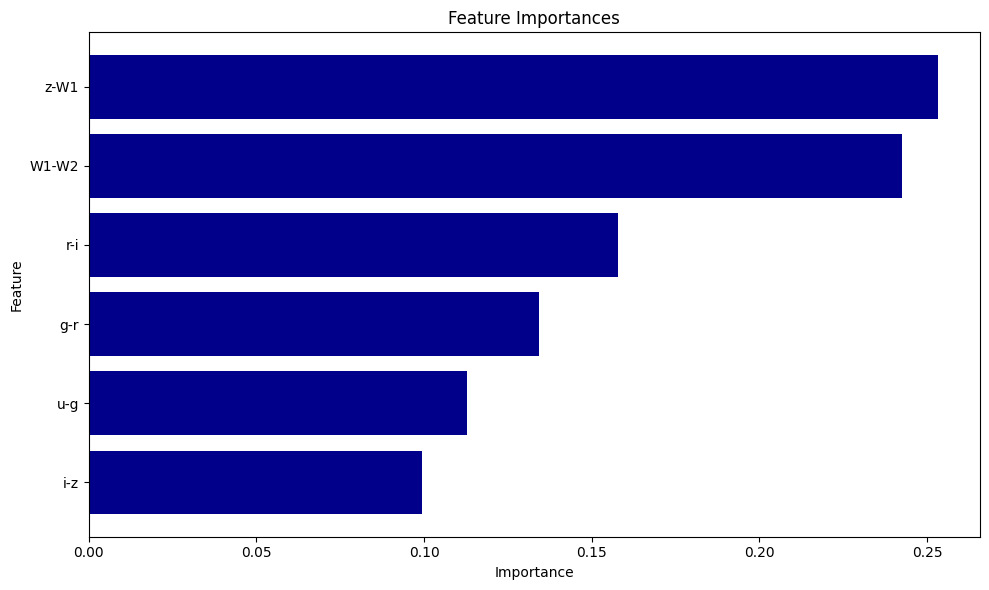

In [ ]:
sorted_indices = np.argsort(importances)

sorted_feature_names = [feature_names[i] for i in sorted_indices]
sorted_importances = importances[sorted_indices]

#Horizontal Bar plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")

#Horizontal Bar chart
plt.barh(range(Sample_2.shape[1]), sorted_importances, color="darkblue", align="center")
plt.yticks(range(Sample_2.shape[1]), sorted_feature_names)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

Photometric diagnostic plots showing the classification of galaxies, stars and quasars

The inclusion of WISE data (infrared) increases the accuracy for distinguishing the classes.

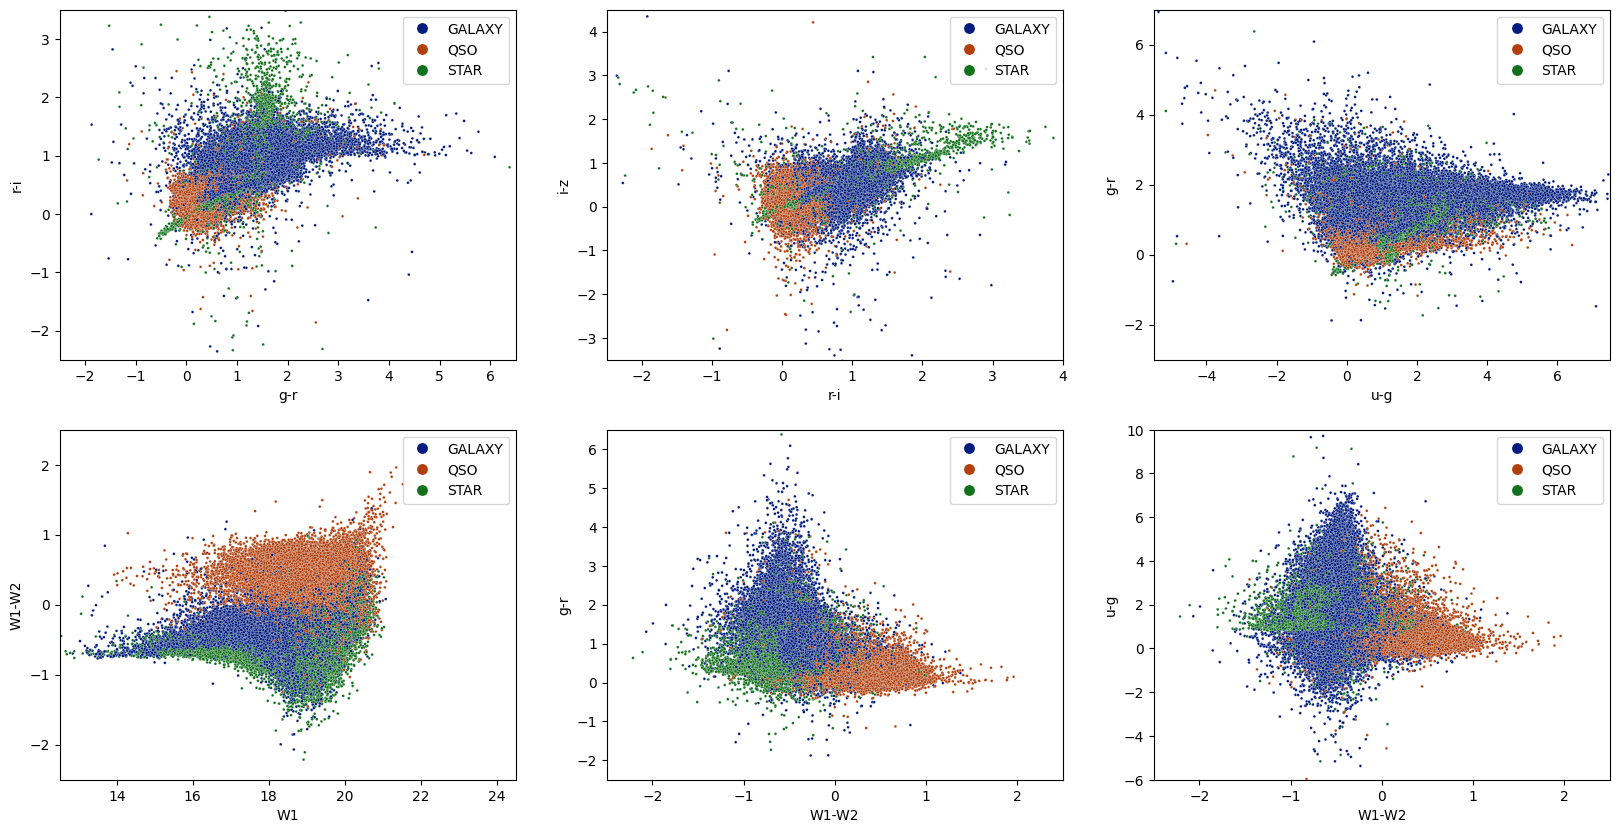

In [ ]:
plt.figure(figsize=(20, 10))
plt.subplot(2,3,1)
sns.scatterplot(x=data['g-r'],y=data['r-i'],hue=data['class'],s=4,palette='dark')
plt.xlim(-2.5,6.5)
plt.ylim(-2.5,3.5)
plt.legend(loc='upper right',markerscale=4)

plt.subplot(2,3,2)
sns.scatterplot(x=data['r-i'],y=data['i-z'],hue=data['class'],s=4,palette='dark')
plt.xlim(-2.5,4)
plt.ylim(-3.5,4.5)
plt.legend(loc='upper right',markerscale=4)

plt.subplot(2,3,3)
sns.scatterplot(x=data['u-g'],y=data['g-r'],hue=data['class'],s=4,palette='dark')
plt.xlim(-5.5,7.5)
plt.ylim(-3,7)
plt.legend(loc='upper right',markerscale=4)

plt.subplot(2,3,4)
sns.scatterplot(x=data['W1'],y=data['W1-W2'],hue=data['class'],s=4,palette='dark')
plt.xlim(12.5,24.5)
plt.ylim(-2.5,2.5)
plt.legend(loc='upper right',markerscale=4)

plt.subplot(2,3,5)
sns.scatterplot(x=data['W1-W2'],y=data['g-r'],hue=data['class'],s=4,palette='dark')
plt.xlim(-2.5,2.5)
plt.ylim(-2.5,6.5)
plt.legend(loc='upper right',markerscale=4)

plt.subplot(2,3,6)
sns.scatterplot(x=data['W1-W2'],y=data['u-g'],hue=data['class'],s=4,palette='dark')
plt.xlim(-2.5,2.5)
plt.ylim(-6,10)
plt.legend(loc='upper right',markerscale=4)


plt.show()

* The Optical-only plots (top row) show a heavy overlap between Stars, quasars and galaxies, with fuzzy smeared boundaries and no clear linear separation.

* The Optical+IR plots (bottom row) show QSOs forming a distinct band at higher W1-W2, stars and galaxies occupying different regions.

* Thus the mid-infrared color W1−W2 separates QSOs from stars and galaxies.



---



### 5)Conclusion:

In this study, we evaluated multiple machine learning models—Random Forest (RF), XGBoost (XGB), k-Nearest Neighbors (KNN), Artificial Neural Networks (ANN), and a weighted voting ensemble—on an unbalanced dataset obtained by merging the ALLWISE catalog with SDSS DR17 photometric data.

Two feature sets were considered. Sample 1 consisted of optical photometric information from SDSS DR17, while Sample 2 combined the optical features from Sample 1 with infrared photometric information obtained from the ALLWISE catalog. Across all evaluated models, the performance obtained using Sample 2 consistently exceeded that of Sample 1.

These results confirm that the inclusion of infrared features refines the classification of different types of astronomical objects when using multiband photometry. The observed improvements in performance metrics across diverse machine-learning model architectures are consistent with the correlation analysis of the photometric features and the enhanced class separation observed in color–color and color–magnitude diagrams.

This implementation focused primarily on the three-class classification problem addressed in the original research paper. Further improvements and deeper classification of astronomical objects using photometric information can be achieved by incorporating spectroscopic data, enabling the subdivision of galaxies into more detailed subclasses such as normal galaxies (NGs), star-forming galaxies (SF), starburst galaxies (SB), active galactic nuclei (AGN), and broad-line galaxies (BL).





---



### 6)References:

 - [1] F. Z. Zeraatgari et al., "Machine learning-based photometric classification of galaxies, quasars, emission-line galaxies, and stars," Mon. Not. R. Astron. Soc., vol. 000, pp. 1–13, Nov. 2023, arXiv: 2311.02951.